## Observations and Insights 

In [1]:
# Write at least three observations or inferences that can be made from the data. 
# Include these observations at the top of notebook (Instruction)
# (1) The heavier the mouse the bigger the tumor volume was.
# (2) For mice s185 that we investigated as timepoint increase it's tummor volume decreased.
# (3) There is almost an equal distribution of male and female mice.
# (4) There is almost an equal distribution of drug regimen.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse = pd.merge(mouse_metadata, study_results, on = 'Mouse ID')

# Display the data table for preview
mouse.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
num_mouse = len(mouse['Mouse ID'].unique())
num_mouse

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Sort Data To Run Function
sorted_mouse = mouse.sort_values(by = ['Mouse ID', 'Timepoint'])

# Reset the index 
sorted_mouse = sorted_mouse.reset_index(drop= True)

duplicate_mouse = []

# Function to determine mice with duplicate timepoint
for i in range(len(sorted_mouse)-1):

    # If Mouse ID/Timepoint of mouse i is the same as mouse (i+1) append Mouse ID to list
    if (sorted_mouse['Mouse ID'][i] == sorted_mouse['Mouse ID'][i+1]) & (sorted_mouse['Timepoint'][i] == sorted_mouse['Timepoint'][i+1]):
        duplicate_mouse.append(sorted_mouse['Mouse ID'][i])

# Convert list to Dataframe so we can use the unique function
duplicate_mouse = pd.DataFrame({'Mouse ID':duplicate_mouse})
duplicate_mouse = duplicate_mouse['Mouse ID'].unique()

# Display duplicate mice, 'g989' is the duplicate mice
print(duplicate_mouse)

['g989']


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse.loc[mouse['Mouse ID'] == duplicate_mouse[0],:]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Remove any data associated with that mouse ID (Instruction)
clean_mouse = mouse.loc[mouse['Mouse ID'] != duplicate_mouse[0]]
clean_mouse.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
num_mice = len(clean_mouse['Mouse ID'].unique())
num_mice

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Groupby 'Drug Regimen'
mouse_regime =  clean_mouse.groupby('Drug Regimen')

# Individual Calculation for Summary Statistics Table
# Mean of Tumor Volume
mouse_mean = mouse_regime['Tumor Volume (mm3)'].mean()

# Median of Tumor Volume
mouse_median = mouse_regime['Tumor Volume (mm3)'].median()

# Variance of Tumor Volume
mouse_var = mouse_regime['Tumor Volume (mm3)'].var()

# Standard Deviation of Tumor Volume
mouse_std = mouse_regime['Tumor Volume (mm3)'].std()

# SEM of Tumor Volume
mouse_sem = mouse_regime['Tumor Volume (mm3)'].sem()

# Create Summary Table by Merging Dataframes and Rename Columns
mouse_summary = pd.merge(mouse_mean, mouse_median, on = 'Drug Regimen')
mouse_summary = mouse_summary.rename(columns = {'Tumor Volume (mm3)_x': 'Mean',
                                               'Tumor Volume (mm3)_y': 'Median'})
mouse_summary = mouse_summary.merge(mouse_var, on = 'Drug Regimen')
mouse_summary = mouse_summary.merge(mouse_std, on = 'Drug Regimen')
mouse_summary = mouse_summary.rename(columns = {'Tumor Volume (mm3)_x': 'Variance',
                                               'Tumor Volume (mm3)_y': 'Standard Deviation'})
mouse_summary = mouse_summary.merge(mouse_sem, on = 'Drug Regimen')
mouse_summary = mouse_summary.rename(columns = {'Tumor Volume (mm3)': 'SEM'})

# Display Summary
mouse_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

# Groupby Drug Regimen and Aggregate and individual columns
summary_agg = clean_mouse.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(Mean='mean', 
                                            Median = 'median',
                                            Variance = 'var',
                                            Standard_Deviation = 'std',
                                            SEM = 'sem'          
                                                     )
# Display Summary
summary_agg


,Mean,Median,Variance,Standard_Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


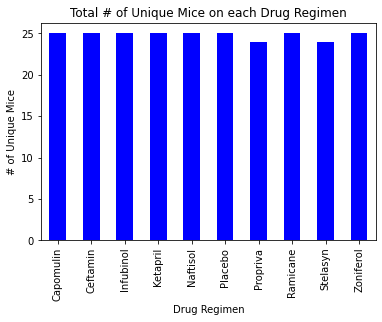

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
unique_mice = clean_mouse[['Mouse ID', 'Drug Regimen']].drop_duplicates(keep = 'first')
unique_mice = unique_mice.groupby('Drug Regimen')['Mouse ID'].count()
unique_mice = pd.DataFrame(unique_mice).reset_index()

# Plot using dataframe.plot()
unique_plot = unique_mice.plot('Drug Regimen', 'Mouse ID', kind ='bar', legend = False, title = "Total # of Unique Mice on each Drug Regimen", color = 'blue')
unique_plot = unique_plot.set_ylabel('# of Unique Mice')

# Display plot
plt.show()

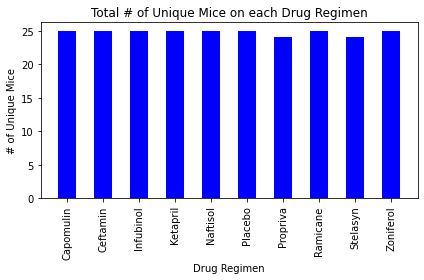

In [11]:
# Generate a bar plot using matplotlib showing the total number of unique mice tested on each drug regimen using pyplot.
plt.bar(unique_mice['Drug Regimen'], unique_mice['Mouse ID'], width = 0.5, color ='blue')

# Add title and name of x-axis/y-axis
plt.title("Total # of Unique Mice on each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Unique Mice")

# Rotate x-axis label to find nicely
plt.xticks(rotation = 'vertical')

plt.tight_layout()

# Display plot
plt.show()

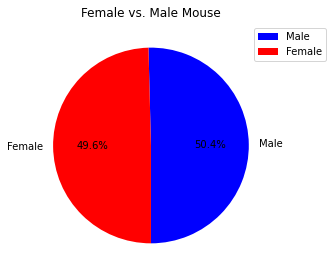

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = clean_mouse.groupby('Mouse ID')['Sex'].min()
gender = pd.DataFrame(gender)
gender = pd.DataFrame(gender['Sex'].value_counts()).reset_index()

# Plot pie graph using dataframe.plot()
gender_mice = gender.plot(y='Sex', labels = gender['index'],  autopct='%1.1f%%', figsize = (4.5,4.5), startangle = -90, kind = 'pie', title='Female vs. Male Mouse', colors = ['blue','red'])

# Move Legend Position
gender_mice.legend(bbox_to_anchor=(.9,1))
gender_mice.set_ylabel('')

# Display plot
plt.show()

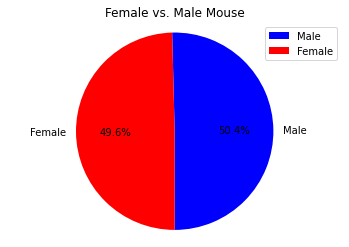

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender['Sex'], labels = gender['index'], autopct="%1.1f%%",startangle=-90, colors = ['blue','red'])
plt.legend()
plt.axis("equal")
plt.title('Female vs. Male Mouse')
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_mouse = clean_mouse.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tumor = pd.merge(last_mouse, clean_mouse, on=['Mouse ID','Timepoint'])
final_tumor

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = [drug for drug in final_tumor['Drug Regimen'].unique()]

final_outliers = pd.DataFrame([])

for drug in treatments:

    # Create empty list to fill with tumor vol data (for plotting)
    tumor_vol = []

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Determine Quartiles of Final Tumor
    for i in range(len(final_tumor)):
        
        if final_tumor['Drug Regimen'][i] == drug:
            tumor_vol.append(final_tumor['Tumor Volume (mm3)'][i])
            
    tumor_vol = pd.DataFrame({'Tumor':tumor_vol})
    quartiles = tumor_vol['Tumor'].quantile([0.25, 0.5, 0.75])
    first_quartile = quartiles[0.25]
    second_quartile = quartiles[0.5]
    third_quartile = quartiles[0.75]

    # Calculate IQR
    iqr = third_quartile - first_quartile
    
    # Determine outliers using upper and lower bounds
    lower_bound = first_quartile - (1.5*iqr)
    upper_bound = third_quartile + (1.5*iqr)

    # Determine Outliers
    # Subset data of mice with Drug Regimen we're currently looking at
    drug_df = final_tumor.loc[(final_tumor['Drug Regimen']==drug), :]
    
    # Subset data of mice that are smaller than lower bound or higher than upper_bound
    outliers = drug_df.loc[(drug_df["Tumor Volume (mm3)"] >= upper_bound) | (drug_df["Tumor Volume (mm3)"]  <= lower_bound), :]
    
    # Vertically Merge (Concat) the outlier rows by 
    final_outliers = pd.concat([final_outliers,outliers])

# Display Outlier Dataframe    
final_outliers.head()

# One Mouse c326 that could be a possible outlier determine from lower/upper bound from IQR
# Infubinol lower bound is about 36.83 and mice c326 has a tumor volume of 36.32

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
31,c326,5,Infubinol,Female,18,25,36.321346,0


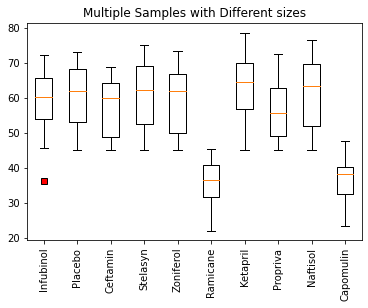

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
import numpy as np 

# Set drug regimen name variable equal to a subset of that drug regimen 
for drugs in treatments:
    my_code = str(drugs)+ " = final_tumor.loc[final_tumor['Drug Regimen'] == '"+str(drugs)+ "', 'Tumor Volume (mm3)']"
    exec(my_code)

data = [Infubinol, Placebo, Ceftamin, Stelasyn, Zoniferol, Ramicane, Ketapril, Propriva, Naftisol, Capomulin]

# Set to plot multiple graphs
figure, micebox = plt.subplots()

# Color Outlier and Plot Boxplot
red_square = dict(markerfacecolor='r', marker='s')
micebox.boxplot(data, flierprops = red_square)

# Relabel X-axis and set Title
micebox.set_title('Multiple Samples with Different sizes')
xticks = np.arange(1, len(treatments)+1)
plt.xticks(xticks, treatments, rotation = 'vertical')

# Display plot
plt.show()


## Line and Scatter Plots

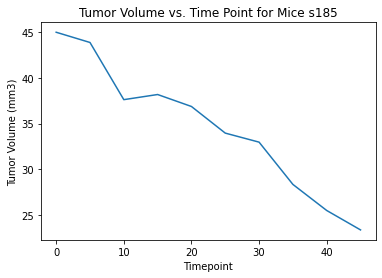

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Subset data of drug regimen Capomulin
capomulin_df = clean_mouse.loc[clean_mouse['Drug Regimen'] == 'Capomulin', : ]

# Reset Dataset
capomulin_df = capomulin_df.reset_index(drop = True)

# Select first mouse in dataframe
mice = capomulin_df['Mouse ID'][0]

# Subset data of mice selected
capomulin_mice = capomulin_df.loc[capomulin_df['Mouse ID'] == mice, : ]

# Display line plot of tumor volume vs time point
plt.plot(capomulin_mice['Timepoint'], capomulin_mice['Tumor Volume (mm3)'])

# Add title and labels
plt.title("Tumor Volume vs. Time Point for Mice s185")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

# Display Plot
plt.show()

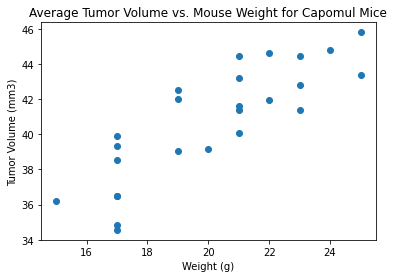

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df_avg = capomulin_df.groupby(["Mouse ID", 'Weight (g)'])['Tumor Volume (mm3)'].mean()
capomulin_df_avg = pd.DataFrame(capomulin_df_avg)
capomulin_df_avg = capomulin_df_avg.reset_index()
capomulin_df_avg 

# Display scatter plot
plt.scatter(capomulin_df_avg['Weight (g)'], capomulin_df_avg['Tumor Volume (mm3)'])

# Relabel Title and Axis
plt.title("Average Tumor Volume vs. Mouse Weight for Capomul Mice")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

# Display plot
plt.show()

## Correlation and Regression

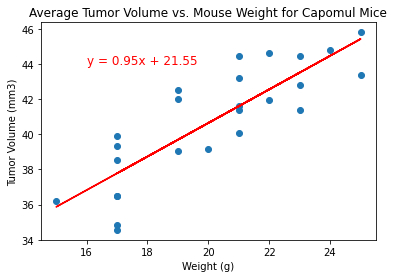

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Set independent values/x values
x_values = capomulin_df_avg['Weight (g)']

# Calculate correlation coefficient
mice_cor = st.pearsonr(capomulin_df_avg['Weight (g)'], capomulin_df_avg["Tumor Volume (mm3)"])

# Caclulate Slope and Intercept
slope, intercept, rvalue, pvalue, stderr = st.linregress(capomulin_df_avg['Weight (g)'], capomulin_df_avg["Tumor Volume (mm3)"])

# Calculate regression/y values
y_values = slope*x_values + intercept

# Create linear regression equation string
line_eq = 'y = ' + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Create scatter point and add linear regression model on top
plt.scatter(capomulin_df_avg['Weight (g)'], capomulin_df_avg['Tumor Volume (mm3)'])
plt.plot(x_values, y_values, 'r-')

# Add linear regression equation
plt.annotate(line_eq, (16, 44), fontsize=12, color='red')

# Add title
plt.title("Average Tumor Volume vs. Mouse Weight for Capomul Mice")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

# Display plot
plt.show()